In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
from src.visualization.visualize import gerar_grafico_retorno_portfolio,gerar_grafico_vol_portfolio,gerar_grafico_retorno_portfolio_cdi,gerar_grafico_sharpe_portfolio

In [4]:
path_load = "../reports/figures/"

### GET DATA RETURN

In [5]:
path = "../data/final/03_returns_benchmarks_rw_12M.csv" #Retono dos benchmarks

In [6]:
path2 = "../data/final/03_returns_portfolios_rw_12M.csv"

In [7]:
path3 = "../data/processed/15_anual_returns_indices.csv"

In [8]:
df = pd.read_csv(path)

In [9]:
df2 = pd.read_csv(path2)

In [10]:
df3 = pd.read_csv(path3).loc[:,["IBOV","data"]]
df3 = df3.add_prefix("Variação_12_Meses_(%)_")
df3["Variação_12_Meses_(%)_IBOV"] = df3["Variação_12_Meses_(%)_IBOV"]*100


In [11]:
lista_dfs = [df,df2,df3]
final_df = reduce(lambda left,right: pd.merge(left,right,on="Variação_12_Meses_(%)_data",how='inner'),lista_dfs).round(4).dropna()

In [12]:
final_df = final_df[["Variação_12_Meses_(%)_data",'Variação_12_Meses_(%)_CDI'
                     ,'Variação_12_Meses_(%)_IMAB5','Variação_12_Meses_(%)_IMAB'
                     ,'Variação_12_Meses_(%)_IHFA','Variação_12_Meses_(%)_IBOV'
                     ,'Variação_12_Meses_(%)_port1','Variação_12_Meses_(%)_port4','Variação_12_Meses_(%)_port8']]

In [50]:
final_df.to_csv("../data/final/05_returns_merge_rw_12M.csv",index=False)

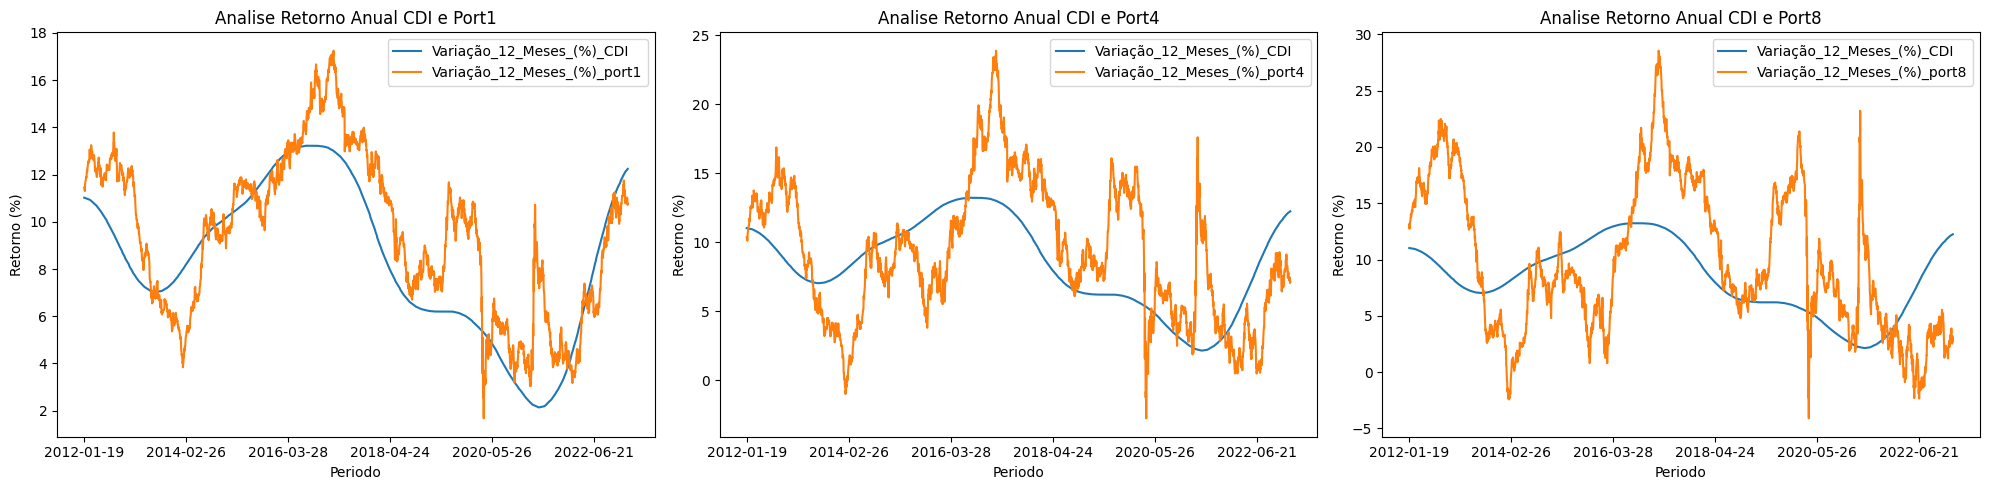

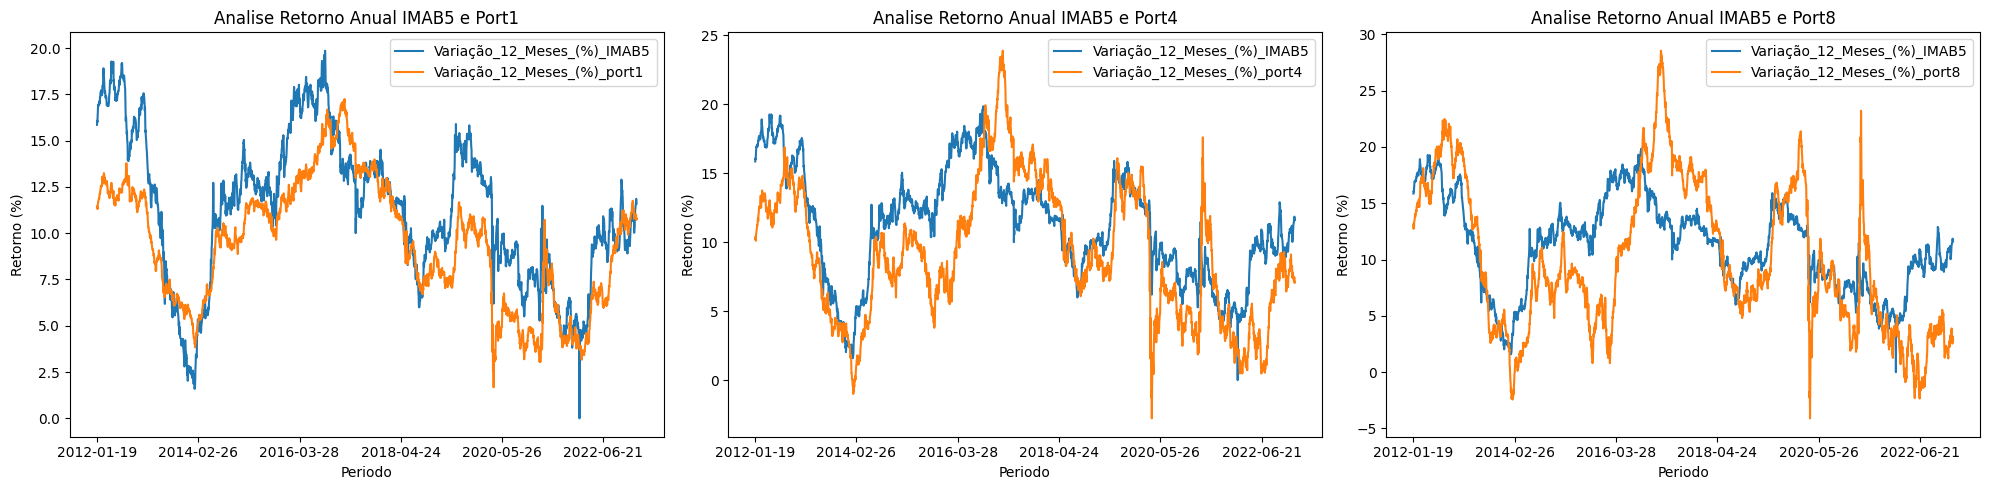

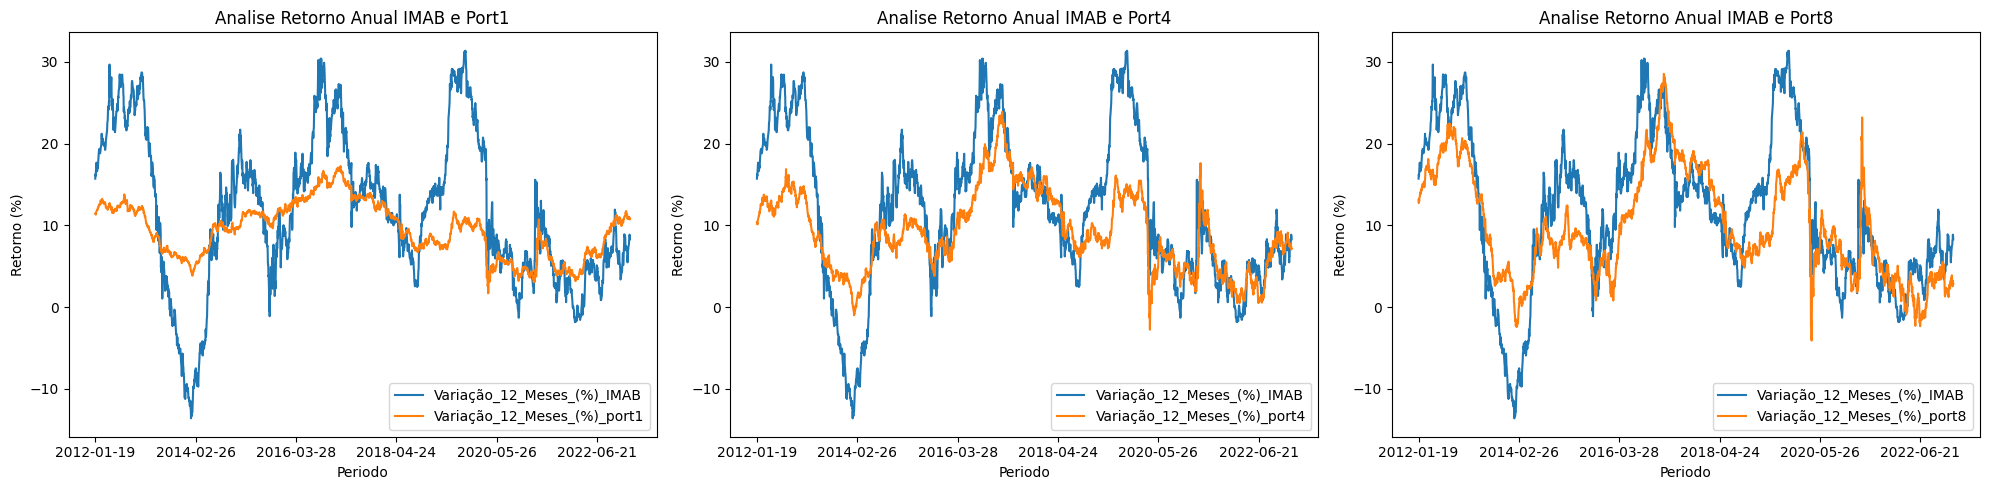

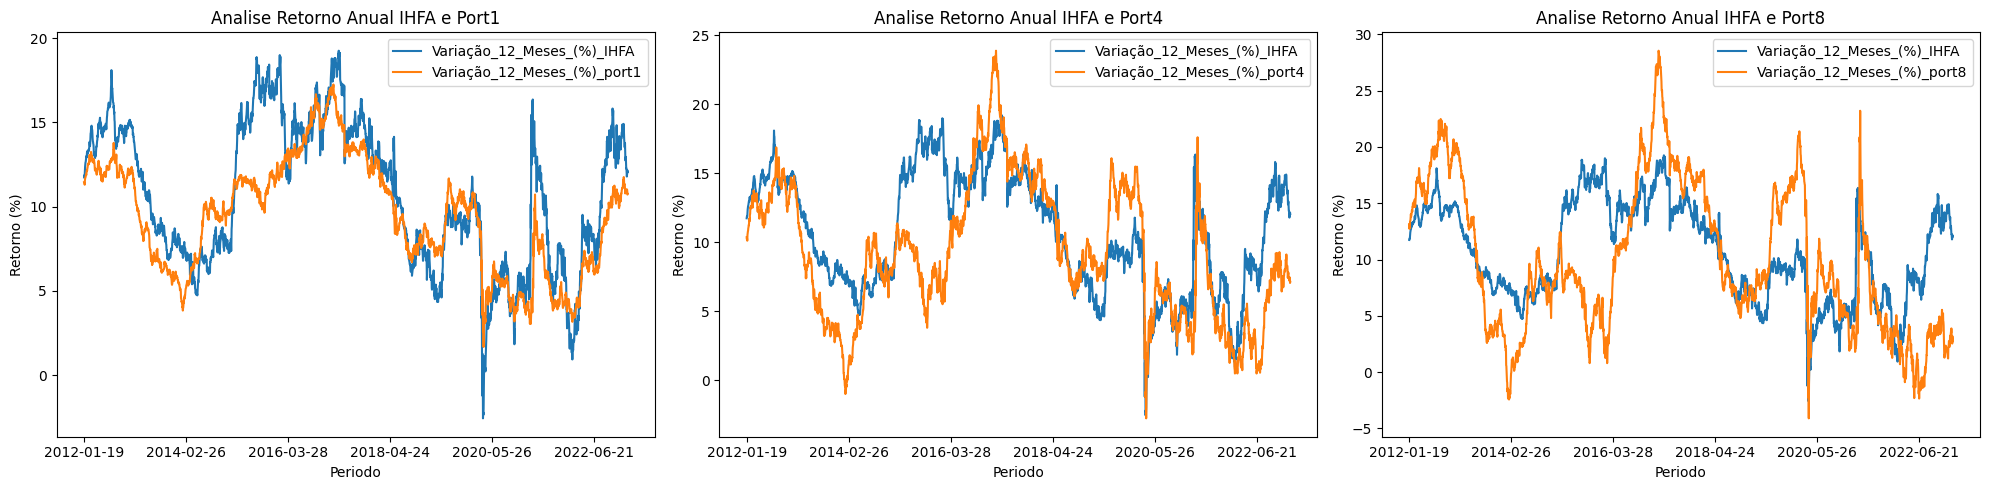

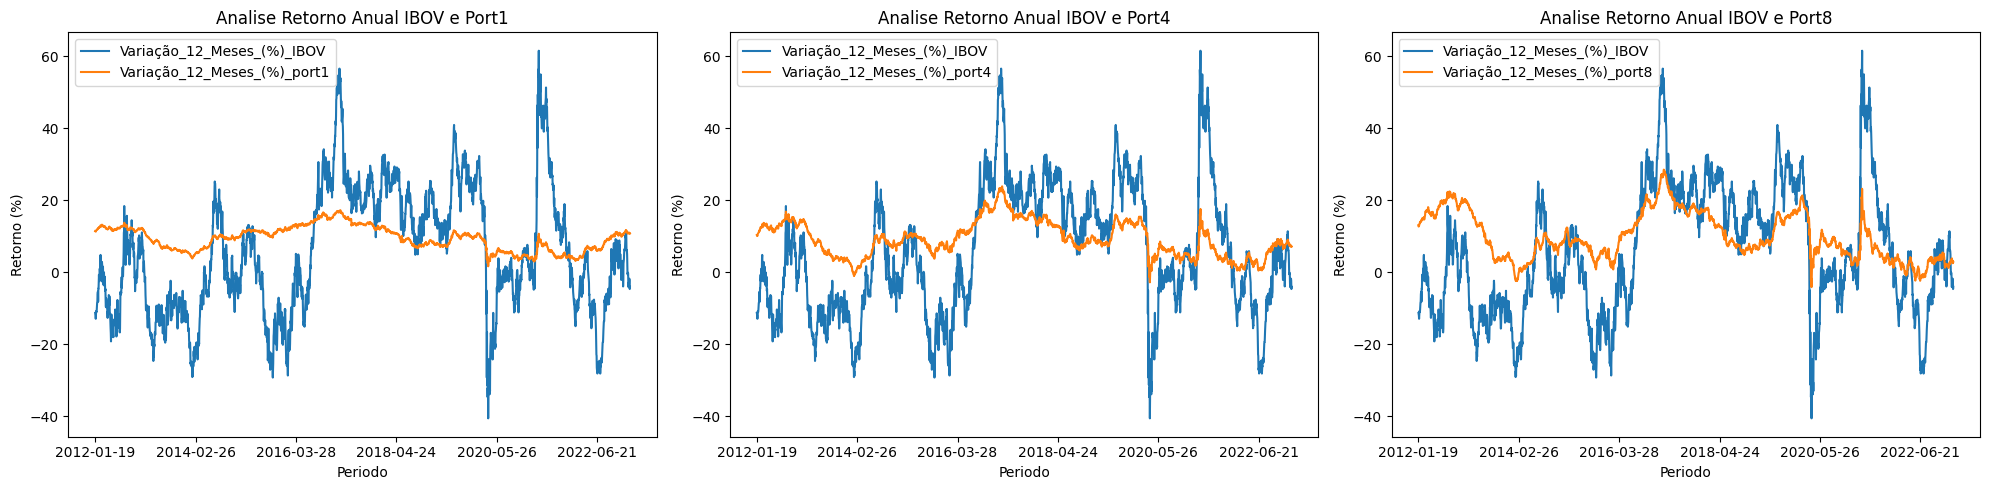

In [13]:
# Gerar Grafico CDI x Portfolios
gerar_grafico_retorno_portfolio("CDI",final_df,path_load=path_load)

# Gerar Grafico IMAB5 x Portfolios
gerar_grafico_retorno_portfolio("IMAB5",final_df,path_load=path_load)

# Gerar Grafico IMAB x Portfolios
gerar_grafico_retorno_portfolio("IMAB",final_df,path_load=path_load)

# Gerar Grafico IHFA x Portfolios
gerar_grafico_retorno_portfolio("IHFA",final_df,path_load=path_load)

# Gerar Grafico IBOV x Portfolios
gerar_grafico_retorno_portfolio("IBOV",final_df,path_load=path_load)

### Get Return in Percent DI

In [14]:
denominator = "Variação_12_Meses_(%)_CDI"
final_df_cdi = final_df.copy()
final_df_cdi.iloc[:,1:] = final_df_cdi.iloc[:,1:].div(final_df[denominator],axis=0)*100

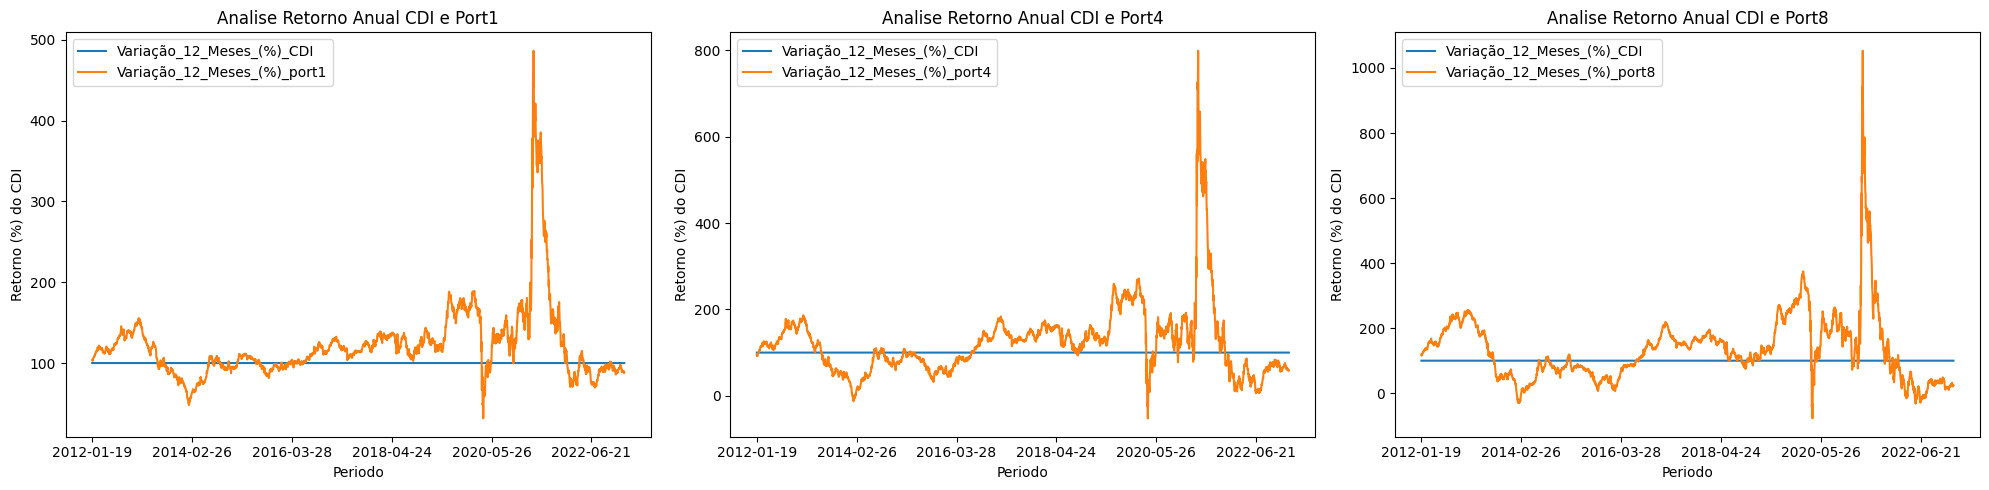

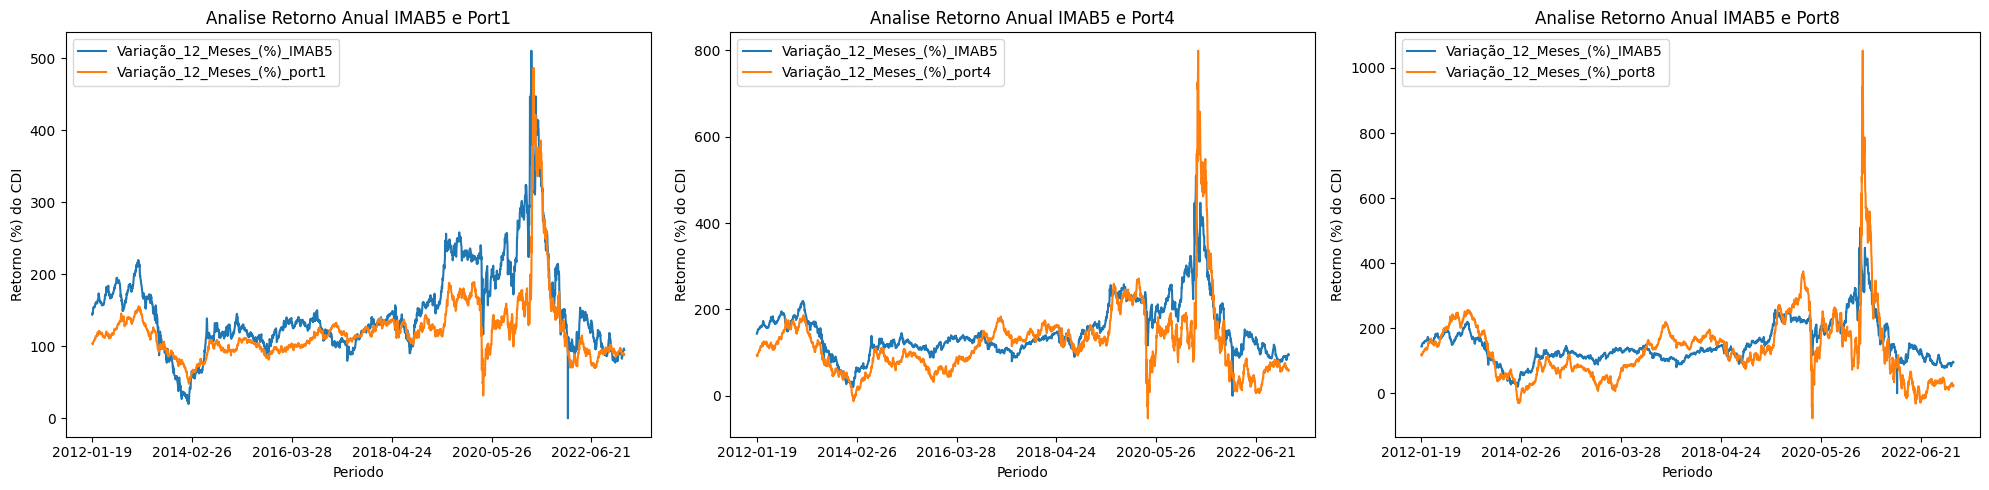

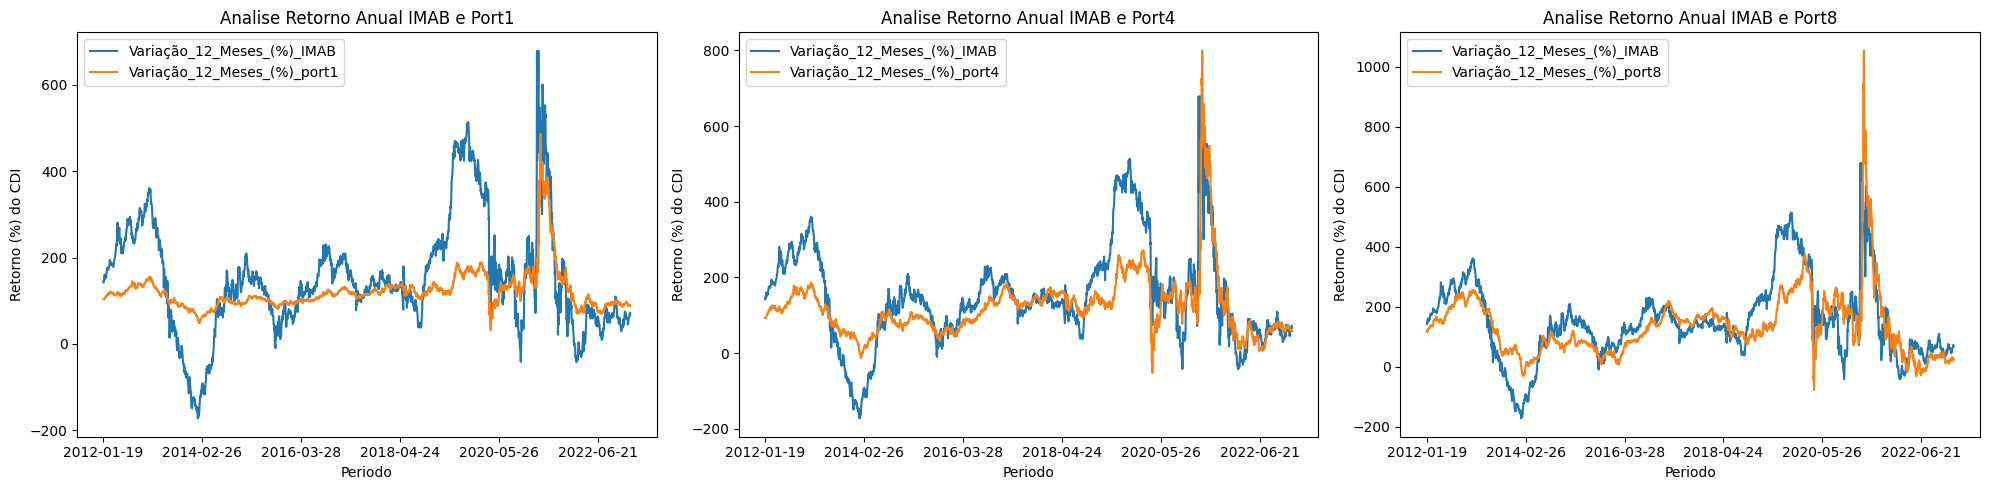

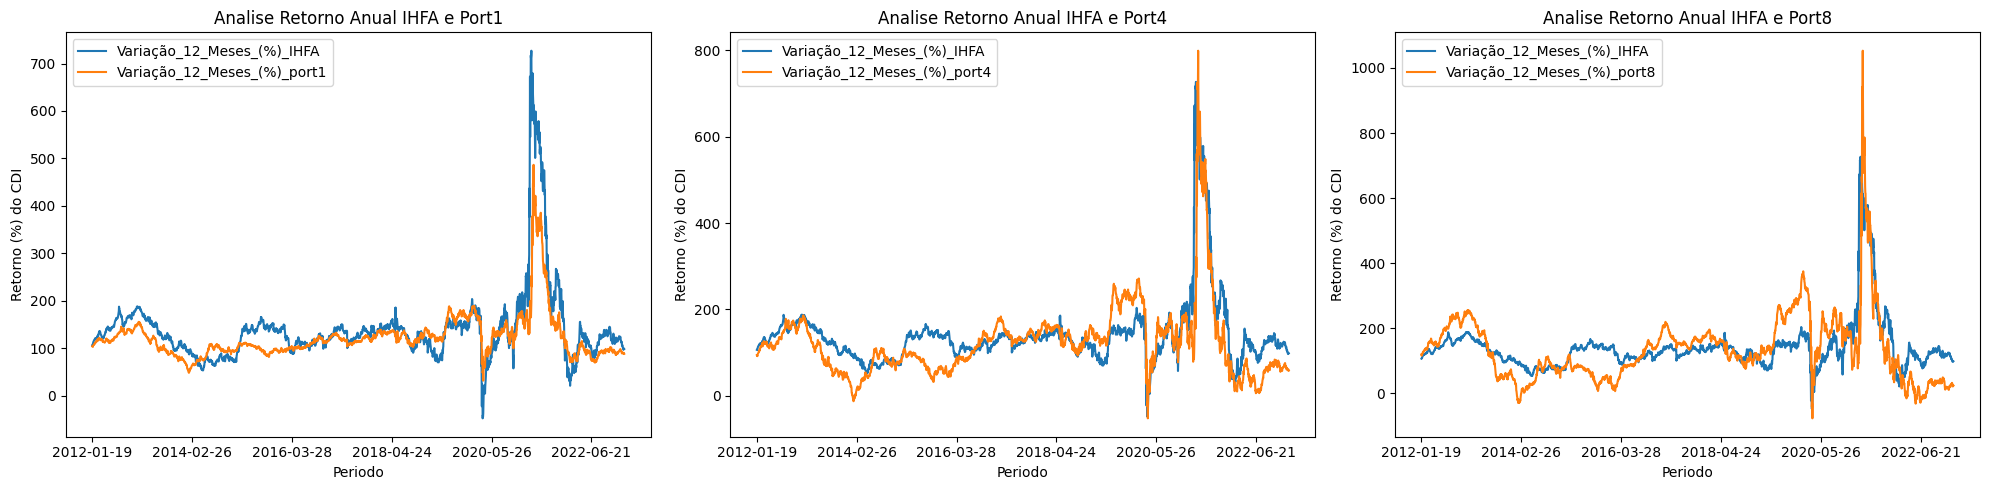

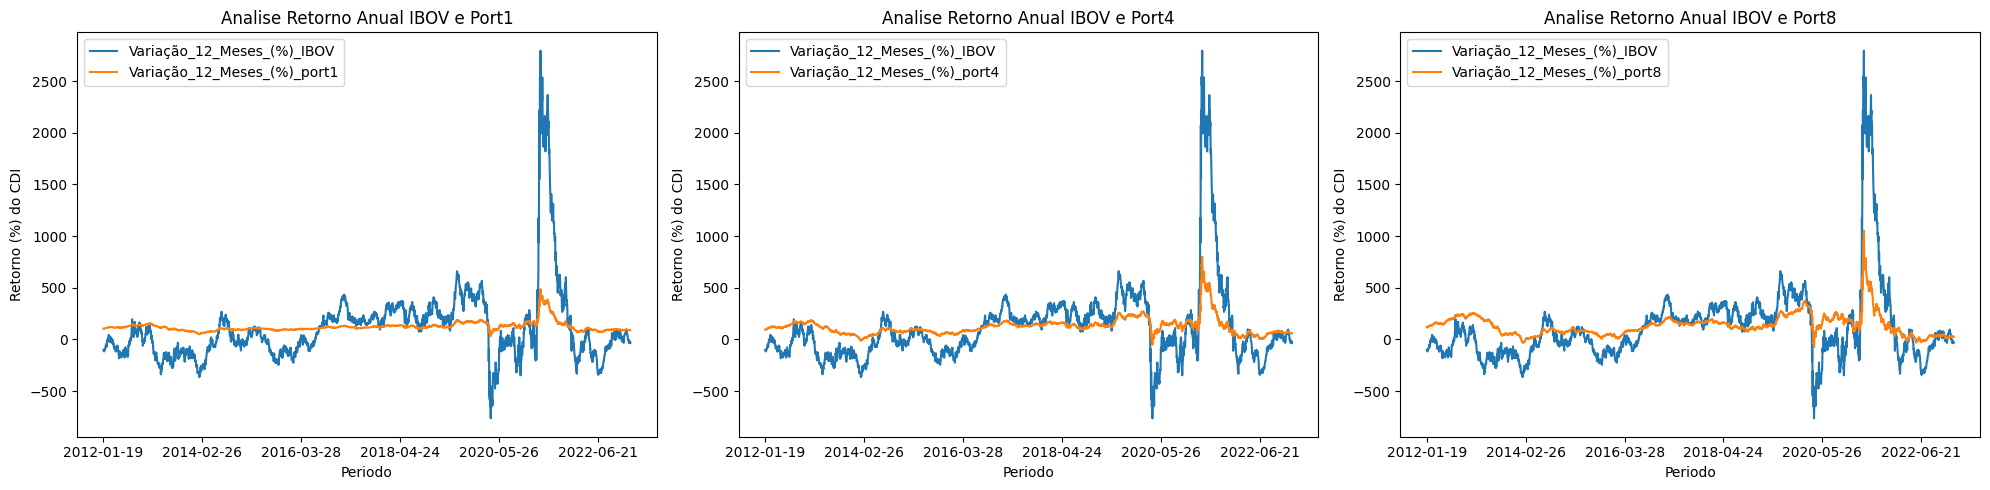

In [15]:
# Gerar Grafico CDI x Portfolios
gerar_grafico_retorno_portfolio_cdi("CDI",final_df_cdi,path_load=path_load)

# Gerar Grafico IMAB5 x Portfolios
gerar_grafico_retorno_portfolio_cdi("IMAB5",final_df_cdi,path_load=path_load)

# Gerar Grafico IMAB x Portfolios
gerar_grafico_retorno_portfolio_cdi("IMAB",final_df_cdi,path_load=path_load)

# Gerar Grafico IHFA x Portfolios
gerar_grafico_retorno_portfolio_cdi("IHFA",final_df_cdi,path_load=path_load)

# Gerar Grafico IBOV x Portfolios
gerar_grafico_retorno_portfolio_cdi("IBOV",final_df_cdi,path_load=path_load)

### GET VOL

In [16]:
path4 = "../data/final/01_vol_benchmarks_rw_3M.csv"

In [17]:
path5 = "../data/final/02_vol_portfolios_rw_3M.csv"

In [18]:
path6 = "../data/final/04_vol_indices_rw_3M.csv"

In [19]:
df = pd.read_csv(path4)
df2 = pd.read_csv(path5)

In [20]:
df3 = pd.read_csv(path6).loc[:,["IBOV","data"]]
df3 = df3.add_prefix("Volatilidade_")
# df3["Variação_12_Meses_(%)_IBOV"] = df3["Variação_12_Meses_(%)_IBOV"]*100


In [21]:
lista_dfs2 = [df,df2,df3]
final_df2 = reduce(lambda left,right: pd.merge(left,right,on="Volatilidade_data",how='inner'),lista_dfs2).round(4).dropna()

In [22]:
final_df2 = final_df2[["Volatilidade_data",'Volatilidade_CDI'
                     ,'Volatilidade_IMAB5','Volatilidade_IMAB'
                     ,'Volatilidade_IHFA','Volatilidade_IBOV'
                     ,'Volatilidade_port1','Volatilidade_port4','Volatilidade_port8']]
final_df2 = final_df2[final_df2["Volatilidade_IMAB5"]<100]

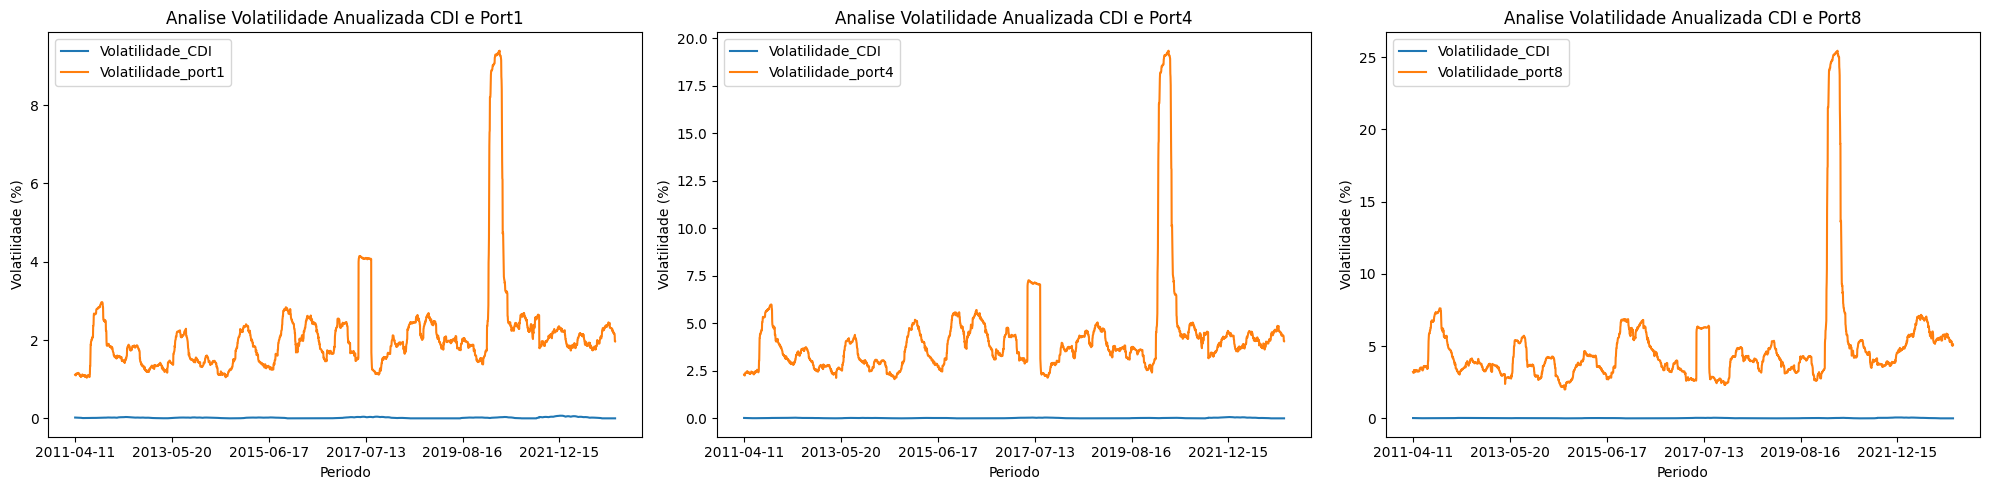

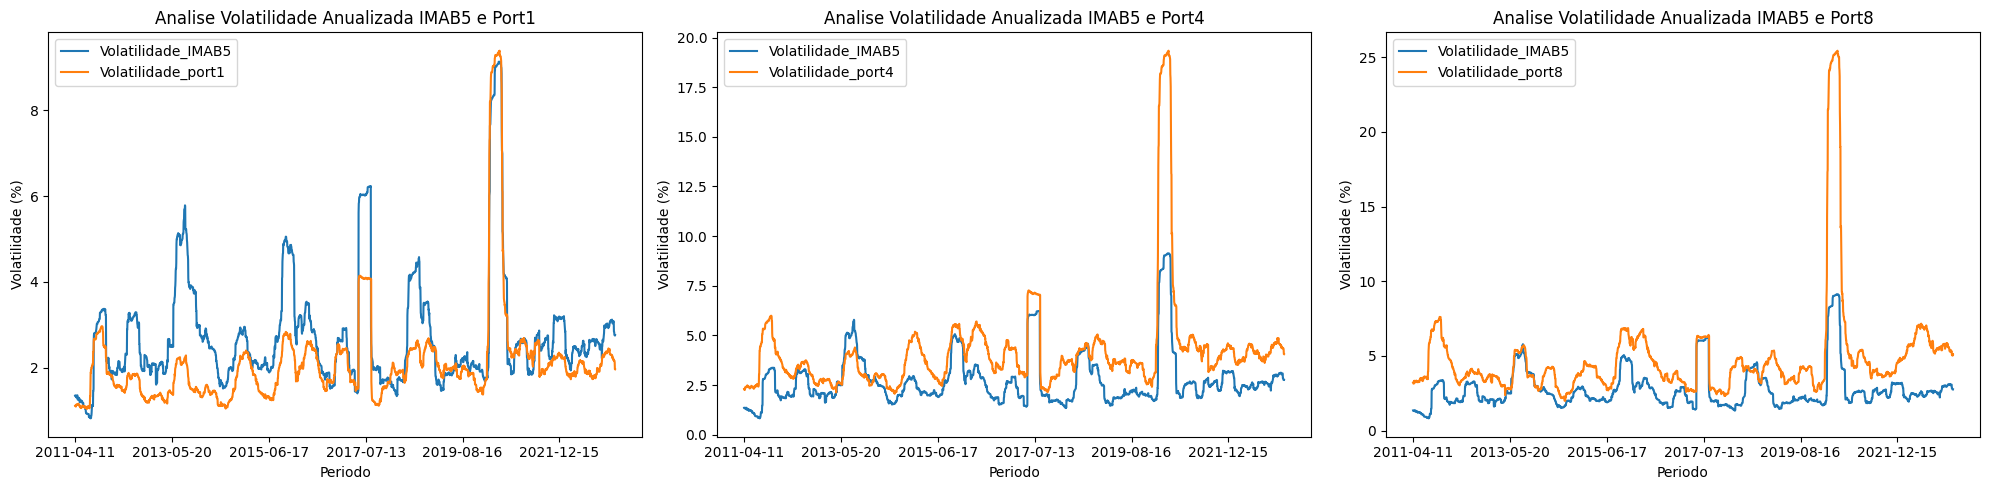

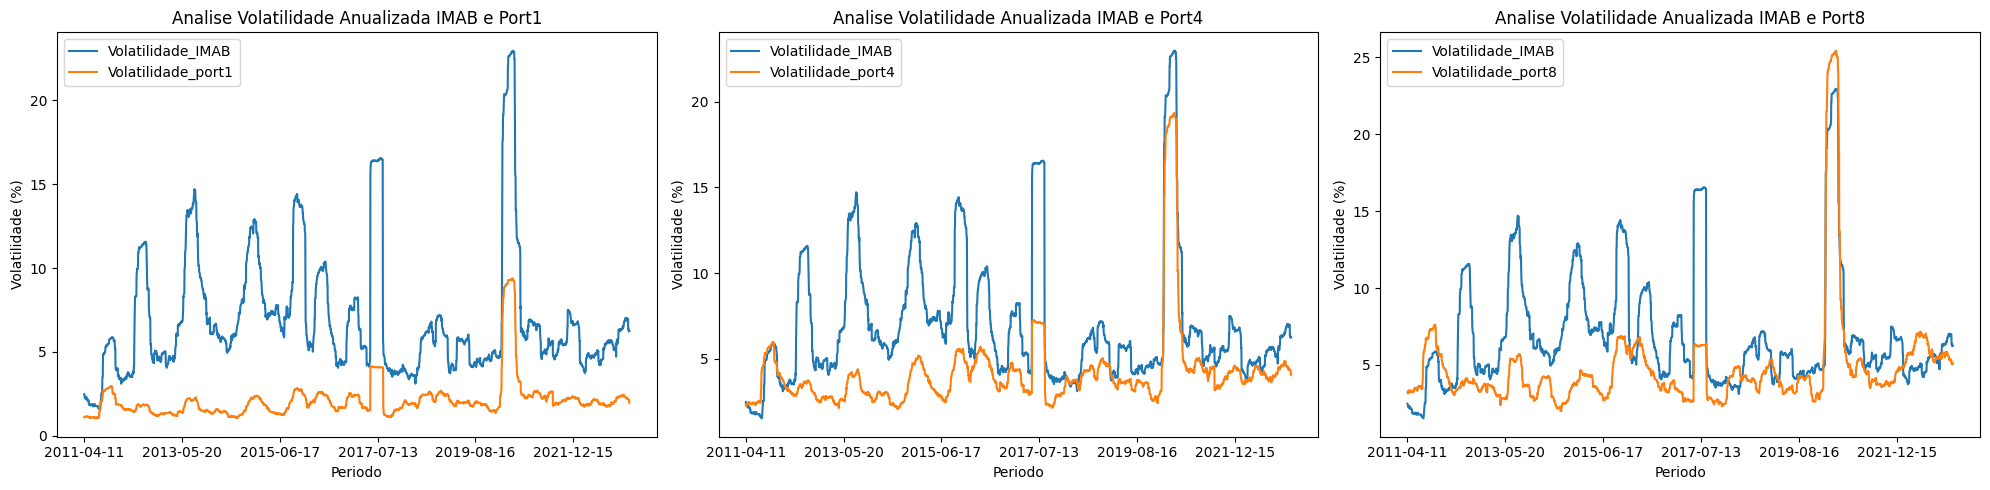

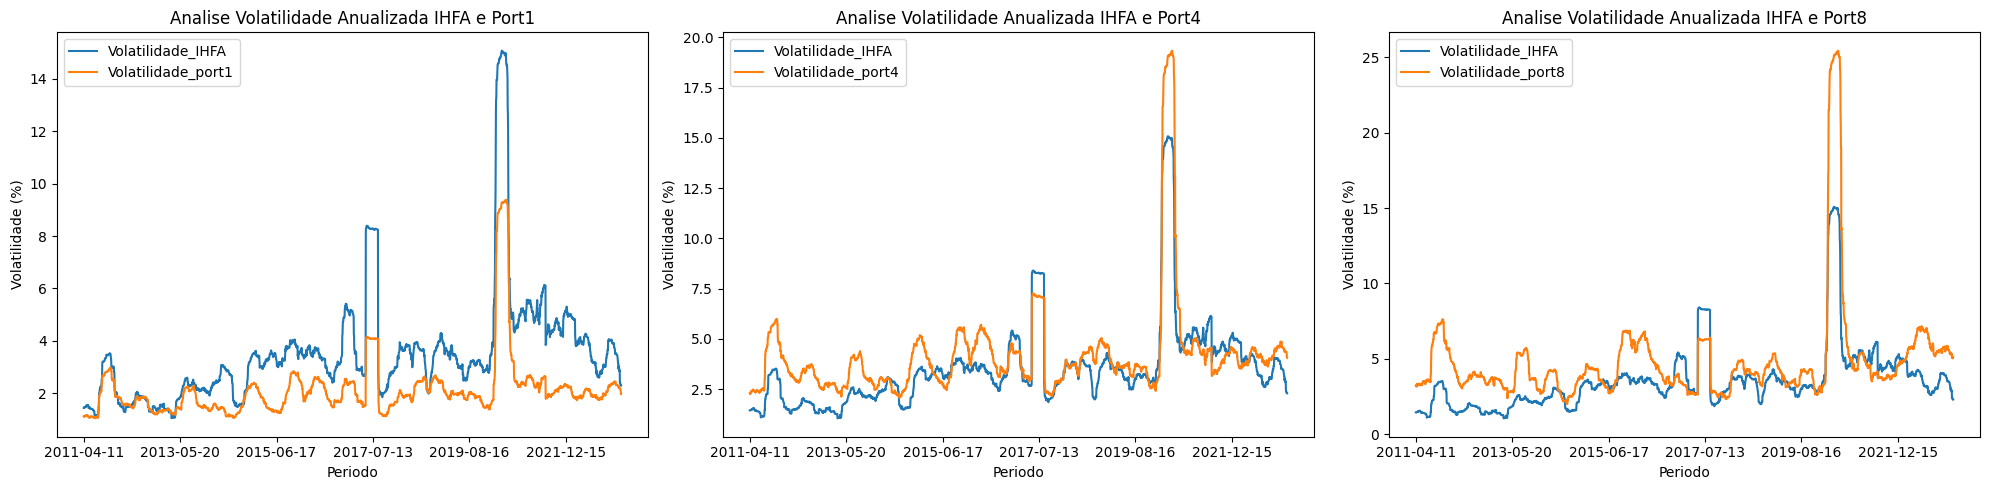

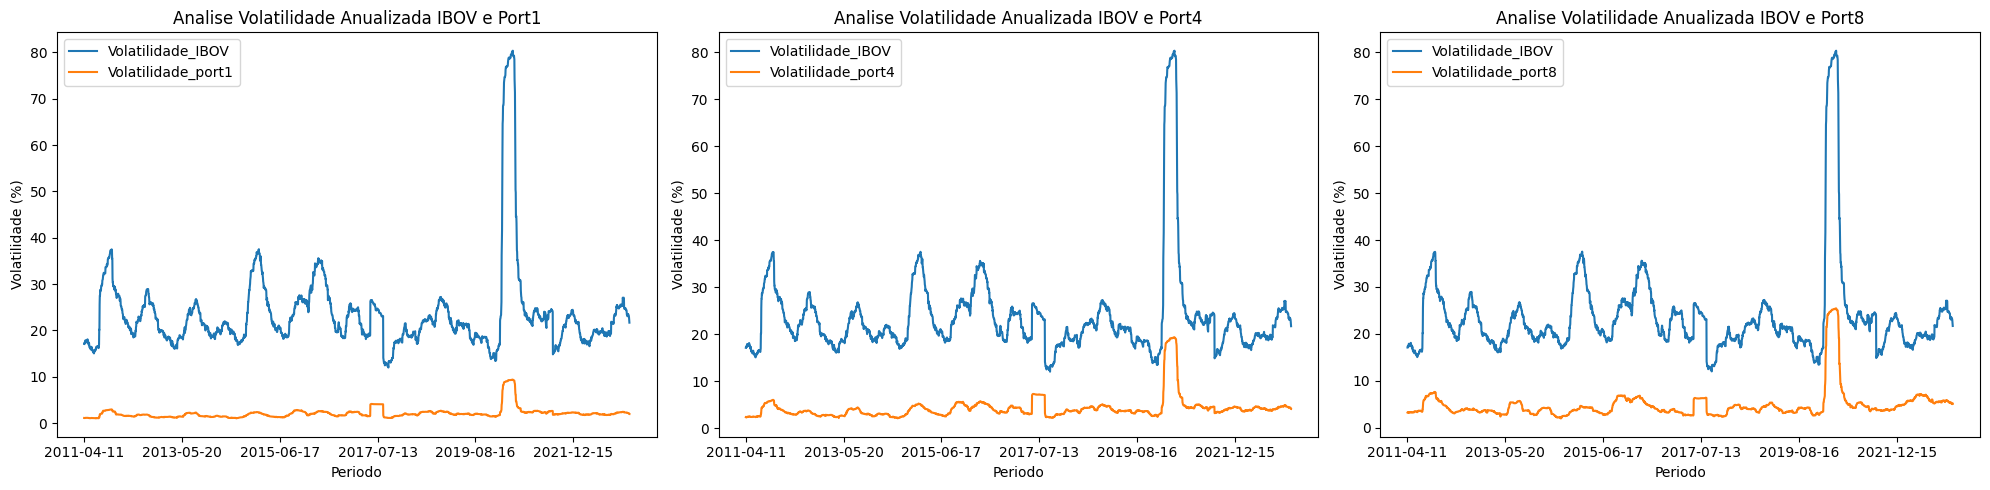

In [23]:
# Gerar Grafico CDI x Portfolios
gerar_grafico_vol_portfolio("CDI",final_df2,path_load=path_load)

# Gerar Grafico IMAB5 x Portfolios
gerar_grafico_vol_portfolio("IMAB5",final_df2,path_load=path_load)

# Gerar Grafico IMAB x Portfolios
gerar_grafico_vol_portfolio("IMAB",final_df2,path_load=path_load)

# Gerar Grafico IHFA x Portfolios
gerar_grafico_vol_portfolio("IHFA",final_df2,path_load=path_load)

# Gerar Grafico IBOV x Portfolios
gerar_grafico_vol_portfolio("IBOV",final_df2,path_load=path_load)

### GET SHARPE ANALYSIS

In [24]:
path7 = "../data/final/01_vol_benchmarks_rw_12M.csv"
path8 = "../data/final/02_vol_portfolios_rw_12M.csv"
path9 = "../data/final/04_vol_indices_rw_12M.csv"


In [25]:
df = pd.read_csv(path7)
df2 = pd.read_csv(path8)

In [26]:
df3 = pd.read_csv(path6).loc[:,["IBOV","data"]]
df3 = df3.add_prefix("Volatilidade_")
# df3["Variação_12_Meses_(%)_IBOV"] = df3["Variação_12_Meses_(%)_IBOV"]*100


In [27]:
lista_dfs3 = [df,df2,df3]
final_df3 = reduce(lambda left,right: pd.merge(left,right,on="Volatilidade_data",how='inner'),lista_dfs3).round(4).dropna()

In [51]:
final_df3.to_csv("../data/final/06_vol_merge_rm_12M.csv")

In [28]:
def sharpe_df(df_vol,df_retorno):
  
  subtract_columns = list(df_retorno.columns[2:])
  minued_column = "Variação_12_Meses_(%)_CDI"
  final_df_subtract = df_retorno.copy()
  final_df_subtract[subtract_columns] = final_df_subtract[subtract_columns].sub(final_df[minued_column],axis=0)
  
  final_df_subtract.rename(columns={'Variação_12_Meses_(%)_data':'data'},inplace=True)
  df_vol.rename(columns={'Volatilidade_data':'data'},inplace=True)

  teste = final_df_subtract.columns[2:].str.split('_')
  colunas = []
  for x in teste:
    colunas.append(x[4])
  
  merge_dfs = pd.merge(final_df_subtract,final_df3,on="data",how="inner")
  
  df_sharpe = pd.DataFrame({"data":merge_dfs["data"]})
  
  array = np.array(np.zeros(len(colunas)))
  for indices in colunas:
    df_sharpe[f'sharpe_{indices}'] = merge_dfs[f'Variação_12_Meses_(%)_{indices}']/merge_dfs[f'Volatilidade_{indices}']
    
    
  return df_sharpe

In [29]:
df_sharpe = sharpe_df(final_df3,final_df)

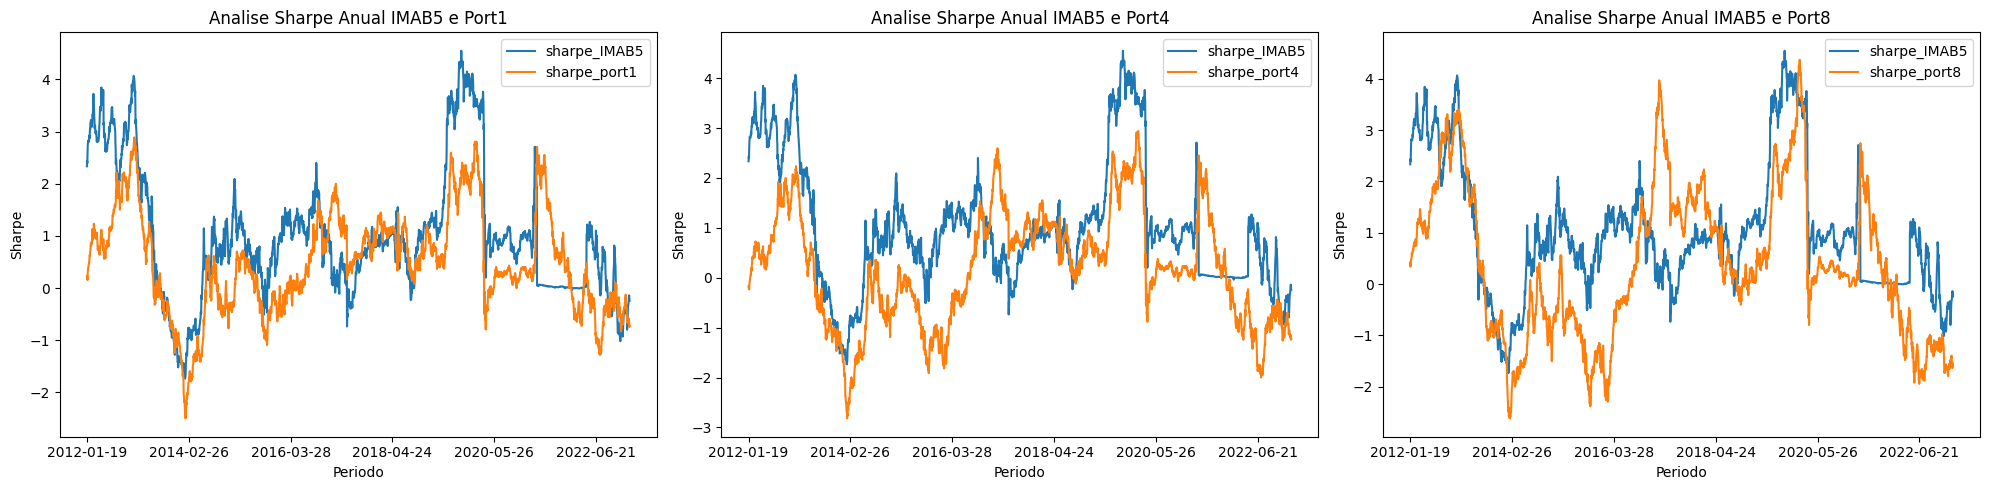

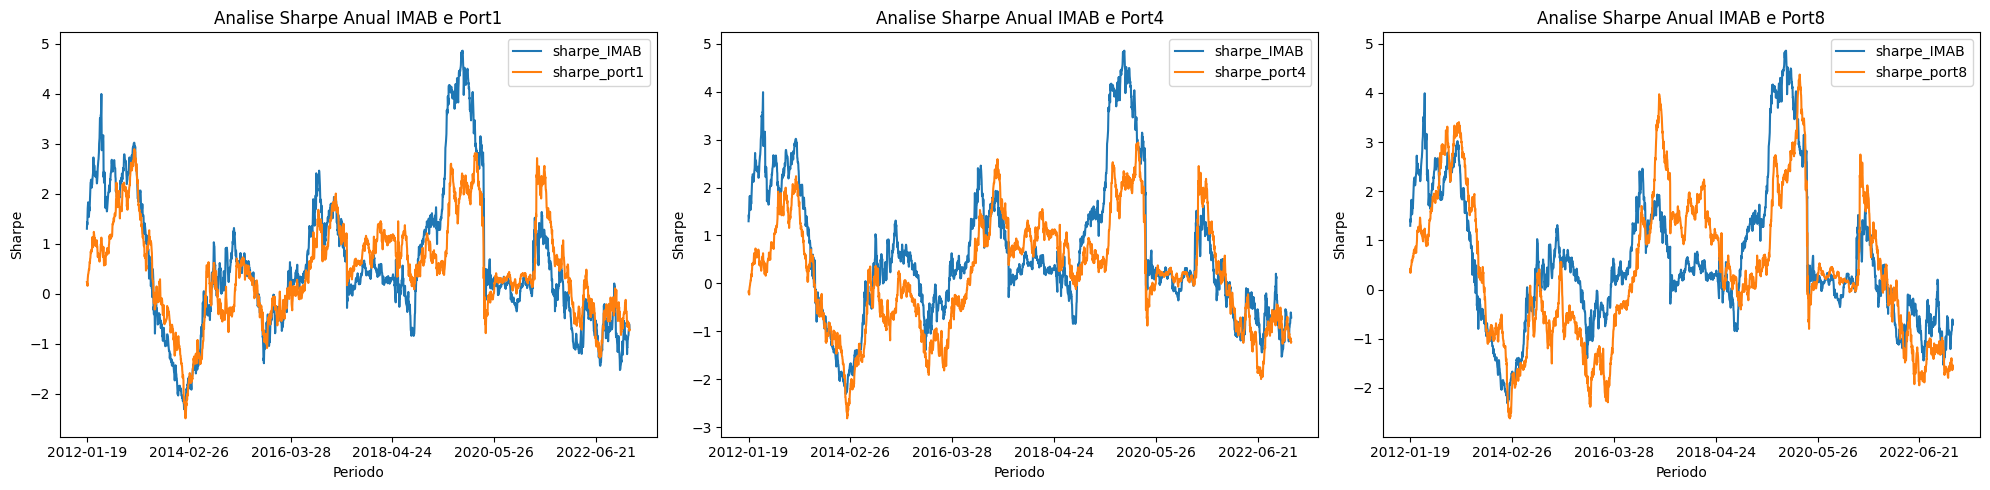

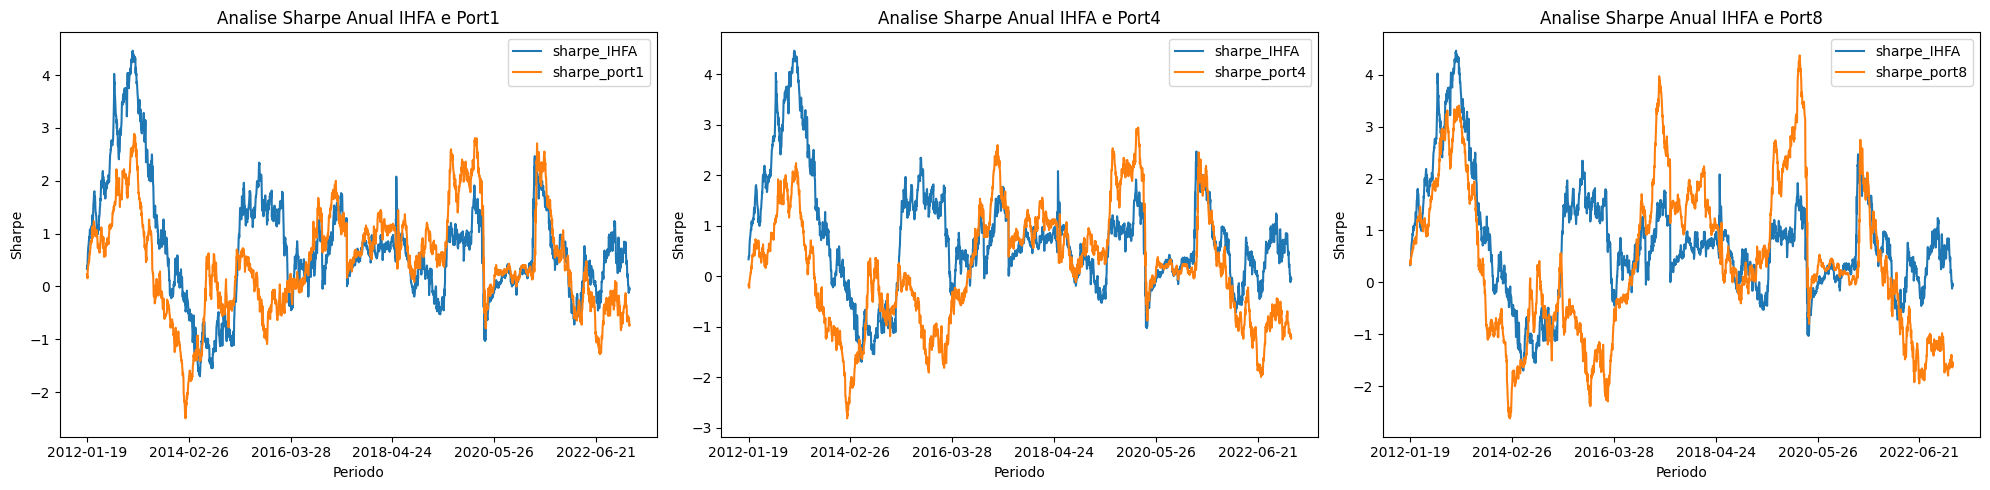

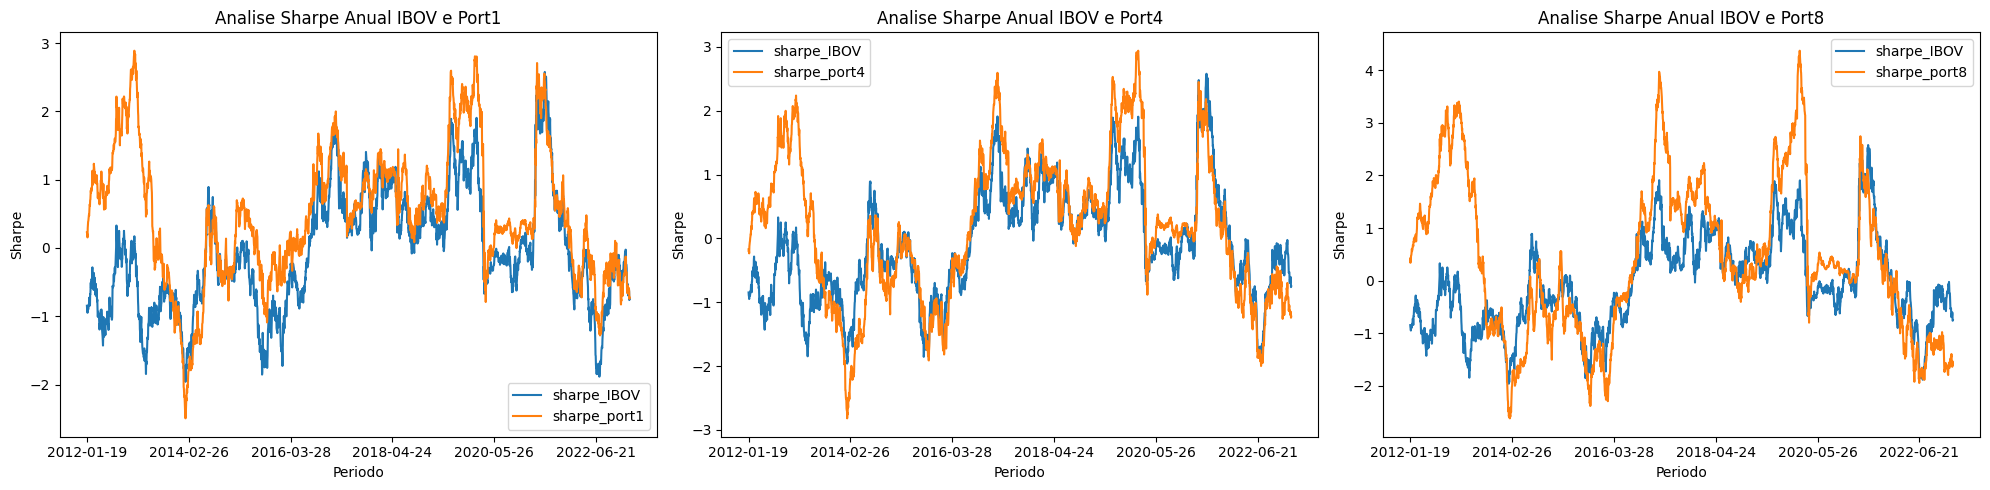

In [31]:
# Gerar Grafico IMAB5 x Portfolios
gerar_grafico_sharpe_portfolio("IMAB5",df_sharpe,path_load=path_load)

# Gerar Grafico IMAB x Portfolios
gerar_grafico_sharpe_portfolio("IMAB",df_sharpe,path_load=path_load)

# Gerar Grafico IHFA x Portfolios
gerar_grafico_sharpe_portfolio("IHFA",df_sharpe,path_load=path_load)

# Gerar Grafico IBOV x Portfolios
gerar_grafico_sharpe_portfolio("IBOV",df_sharpe,path_load=path_load)

In [ ]:
# fig,([ax0,ax1,ax2]) = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
# benchmark = "IMAB5"
# final_df.plot(kind="line",
#               x="Variação_12_Meses_(%)_data",
#               y=[f'Variação_12_Meses_(%)_{benchmark}','Variação_12_Meses_(%)_port1'],
#               xlabel="Periodo",
#               ylabel="Retorno (%)",
#               title=f'Analise Retorno Anual {benchmark} e Port1',
#               ax=ax0)

# final_df.plot(kind="line",
#               x="Variação_12_Meses_(%)_data",
#               y=[f'Variação_12_Meses_(%)_{benchmark}','Variação_12_Meses_(%)_port4'],
#               xlabel="Periodo",
#               ylabel="Retorno (%)",
#               title=f'Analise Retorno Anual {benchmark} e Port4',
#               ax=ax1)

# final_df.plot(kind="line",
#               x="Variação_12_Meses_(%)_data",
#               y=[f'Variação_12_Meses_(%)_{benchmark}','Variação_12_Meses_(%)_port8'],
#               xlabel="Periodo",
#               ylabel="Retorno (%)",
#               title=f'Analise Retorno Anual {benchmark} e Port8',
#               ax=ax2)
# plt.tight_layout();
# fig.savefig(path_load+f'Retorno_Port_{benchmark}.png')